In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df_pandas = pd.read_csv('sales_data_sample.csv', sep=',' , encoding='ansi')

In [3]:
df_pandas.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<Axes: ylabel='count'>

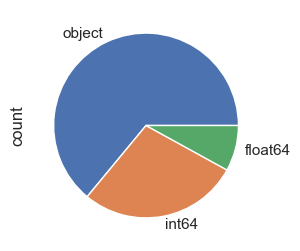

In [4]:
plt.figure(figsize = (4,3))
df_pandas.dtypes.value_counts().plot.pie()

In [5]:
def count_vall_null_df_pandas(df_miss) : 
    df_miss_count_pd = df_miss.isna().sum()
    return df_miss_count_pd

In [6]:
count_vall_null_df_pandas(df_pandas)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df_pandas.shape

(2823, 25)

In [8]:
missing_values = (df_pandas.isna().sum()*100)/df_pandas.shape[0]

<Axes: title={'center': 'données manquantes'}, ylabel='%'>

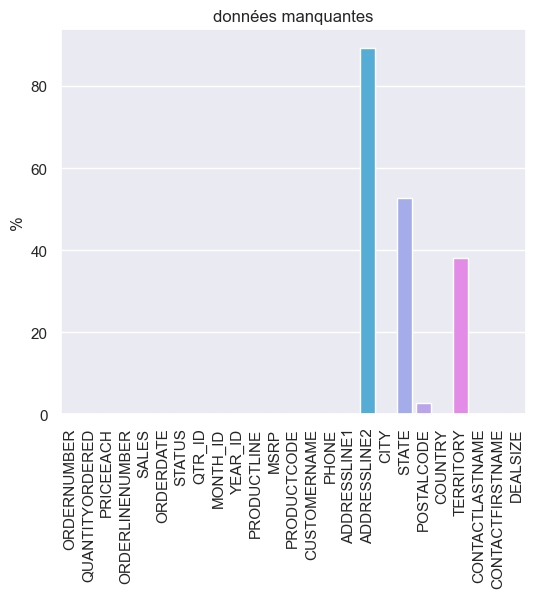

In [9]:
plt.figure(figsize = (6,5))
plt.xticks(rotation = 90)
plt.ylabel('%')
plt.title('données manquantes')
sns.barplot( x = df_pandas.columns, y =missing_values)

In [10]:
# Nettoyages des données avec pandas

In [11]:
df_pandas['TERRITORY'].mode()

0    EMEA
Name: TERRITORY, dtype: object

In [12]:
mode_territory = df_pandas['TERRITORY'].mode()[0]

In [13]:
mode_territory

'EMEA'

In [14]:
df_pandas['TERRITORY'].fillna(mode_territory, inplace=True)
missing_values_count = df_pandas['TERRITORY'].isna().sum()
missing_values_count

0

In [15]:
df_pandas['ADDRESSLINE2'].fillna(df_pandas['ADDRESSLINE2'].mode()[0] , inplace= True)

In [16]:
df_pandas['STATE'].fillna(df_pandas['STATE'].mode()[0] , inplace= True)

In [17]:
df_pandas['POSTALCODE'].fillna(df_pandas['POSTALCODE'].mode()[0] , inplace= True)

In [18]:
count_vall_null_df_pandas(df_pandas)

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

#### USING SPARK FOR TRANSFORMATIONS

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [20]:
#Creer une session spark pour pouvoir interagir avec les fonctionnalité de spark

spark = SparkSession.builder.appName('Tr aitement_doonées').getOrCreate() 

In [21]:
# importer mes données avec spark : 
df_spark1 = spark.read.csv('sales_data_sample.csv', header = True, inferSchema= True)

In [22]:
# la taille de mon dataframe : 
print( f"nombre de colonnes : {len(df_spark1.columns)}, nombre de lignes : {df_spark1.count()}")

nombre de colonnes : 25, nombre de lignes : 2823


In [23]:
# les types de chaque colonnes  : 
df_spark1.printSchema()

root
 |-- ORDERNUMBER: integer (nullable = true)
 |-- QUANTITYORDERED: integer (nullable = true)
 |-- PRICEEACH: double (nullable = true)
 |-- ORDERLINENUMBER: integer (nullable = true)
 |-- SALES: double (nullable = true)
 |-- ORDERDATE: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- QTR_ID: integer (nullable = true)
 |-- MONTH_ID: integer (nullable = true)
 |-- YEAR_ID: integer (nullable = true)
 |-- PRODUCTLINE: string (nullable = true)
 |-- MSRP: integer (nullable = true)
 |-- PRODUCTCODE: string (nullable = true)
 |-- CUSTOMERNAME: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- ADDRESSLINE1: string (nullable = true)
 |-- ADDRESSLINE2: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- POSTALCODE: string (nullable = true)
 |-- COUNTRY: string (nullable = true)
 |-- TERRITORY: string (nullable = true)
 |-- CONTACTLASTNAME: string (nullable = true)
 |-- CONTACTFIRSTNAME: string (nullable = tr

In [24]:
df_spark1.dtypes

[('ORDERNUMBER', 'int'),
 ('QUANTITYORDERED', 'int'),
 ('PRICEEACH', 'double'),
 ('ORDERLINENUMBER', 'int'),
 ('SALES', 'double'),
 ('ORDERDATE', 'string'),
 ('STATUS', 'string'),
 ('QTR_ID', 'int'),
 ('MONTH_ID', 'int'),
 ('YEAR_ID', 'int'),
 ('PRODUCTLINE', 'string'),
 ('MSRP', 'int'),
 ('PRODUCTCODE', 'string'),
 ('CUSTOMERNAME', 'string'),
 ('PHONE', 'string'),
 ('ADDRESSLINE1', 'string'),
 ('ADDRESSLINE2', 'string'),
 ('CITY', 'string'),
 ('STATE', 'string'),
 ('POSTALCODE', 'string'),
 ('COUNTRY', 'string'),
 ('TERRITORY', 'string'),
 ('CONTACTLASTNAME', 'string'),
 ('CONTACTFIRSTNAME', 'string'),
 ('DEALSIZE', 'string')]

In [25]:
## Orderdate est de type String, a transformer en type date 

In [26]:
df_spark1 = df_spark1.withColumn('ORDERDATE', to_date(col('ORDERDATE'), 'M/d/y H:mm'))
df_spark1.dtypes[5]

('ORDERDATE', 'date')

In [27]:
# fonction qui me compte le nombre de valeurs nulles sur mon dataframe

In [28]:
def count_vall_null_df_spark(dataframe) : 
    for colonne , dtype in dataframe.dtypes :
        if dtype == 'date' : 
            count = dataframe.filter(col(colonne).isNull()).count() 
        else : 
            count = dataframe.filter(col(colonne).isNull() | isnan(col(colonne))).count()
        x = print(f"{colonne}, {count}")
    return x 


In [29]:
count_vall_null_df_spark(df_spark1)

ORDERNUMBER, 0
QUANTITYORDERED, 0
PRICEEACH, 0
ORDERLINENUMBER, 0
SALES, 0
ORDERDATE, 0
STATUS, 0
QTR_ID, 0
MONTH_ID, 0
YEAR_ID, 0
PRODUCTLINE, 0
MSRP, 0
PRODUCTCODE, 0
CUSTOMERNAME, 0
PHONE, 0
ADDRESSLINE1, 0
ADDRESSLINE2, 2521
CITY, 0
STATE, 1486
POSTALCODE, 76
COUNTRY, 0
TERRITORY, 0
CONTACTLASTNAME, 0
CONTACTFIRSTNAME, 0
DEALSIZE, 0


#### 2. Effectuez un nettoyage des données en supprimant toutes les valeurs nulles ou manquantes du dataframe

In [36]:
df_spark1 = df_spark1.na.drop()

In [40]:
count_vall_null_df_spark(df_spark1)
print(f"{df_spark1.count()} ,{len(df_spark1.columns)}")

ORDERNUMBER, 0
QUANTITYORDERED, 0
PRICEEACH, 0
ORDERLINENUMBER, 0
SALES, 0
ORDERDATE, 0
STATUS, 0
QTR_ID, 0
MONTH_ID, 0
YEAR_ID, 0
PRODUCTLINE, 0
MSRP, 0
PRODUCTCODE, 0
CUSTOMERNAME, 0
PHONE, 0
ADDRESSLINE1, 0
ADDRESSLINE2, 0
CITY, 0
STATE, 0
POSTALCODE, 0
COUNTRY, 0
TERRITORY, 0
CONTACTLASTNAME, 0
CONTACTFIRSTNAME, 0
DEALSIZE, 0
250 ,25


#### 3) Calculer les ventes total pour chaque catégorie de produits

In [41]:
df_spark1.createOrReplaceGlobalTempView('df_sql') 

In [42]:
# Methode 1 en utulisant spark sql createGlobaltempview 

sales_total_par_categorie= spark.sql("""   
            SELECT PRODUCTCODE, ROUND(SUM(SALES),2) AS total_sales_par_categorie
            FROM global_temp.df_sql
            WHERE PRODUCTCODE is not NULL
            GROUP BY  PRODUCTCODE
            ORDER BY SUM(SALES) DESC  """)
sales_total_par_categorie.show(10)

+-----------+-------------------------+
|PRODUCTCODE|total_sales_par_categorie|
+-----------+-------------------------+
|   S18_2238|                 28455.05|
|   S18_3232|                 26372.86|
|   S10_4698|                 26062.79|
|   S18_2795|                 19255.22|
|   S18_4721|                 19087.96|
|   S18_4027|                 18900.91|
|   S12_1666|                 18616.09|
|   S24_2887|                 18576.34|
|   S18_2949|                 18120.69|
|   S18_1342|                 16796.87|
+-----------+-------------------------+
only showing top 10 rows



In [43]:
from pyspark.sql import functions as F

In [44]:
# deuxieme_methode
ventes_par_categorie = df_spark1.groupBy("PRODUCTCODE") \
                                .agg(F.round(F.sum("SALES"), 2).alias("VENTES_TOTALES")) \
                                .orderBy(F.desc("VENTES_TOTALES"))
ventes_par_categorie.show(10)


+-----------+--------------+
|PRODUCTCODE|VENTES_TOTALES|
+-----------+--------------+
|   S18_2238|      28455.05|
|   S18_3232|      26372.86|
|   S10_4698|      26062.79|
|   S18_2795|      19255.22|
|   S18_4721|      19087.96|
|   S18_4027|      18900.91|
|   S12_1666|      18616.09|
|   S24_2887|      18576.34|
|   S18_2949|      18120.69|
|   S18_1342|      16796.87|
+-----------+--------------+
only showing top 10 rows



#### 4) Trouvez le top 5 des produits avec les revenus de ventes les plus élevés

In [45]:
# Methode_1 
top_5 = spark.sql("""
                  SELECT PRODUCTCODE , SUM(SALES) as Top_5
                  FROM global_temp.df_sql 
                  WHERE PRODUCTCODE is not NULL
                  GROUP BY PRODUCTCODE 
                  ORDER BY SUM(SALES)  DESC
                  LIMIT 5
                  """)
top_5.show()

+-----------+--------+
|PRODUCTCODE|   Top_5|
+-----------+--------+
|   S18_2238|28455.05|
|   S18_3232|26372.86|
|   S10_4698|26062.79|
|   S18_2795|19255.22|
|   S18_4721|19087.96|
+-----------+--------+



In [46]:
# Methode_2 
top5 = df_spark1.groupBy("PRODUCTCODE").agg(F.round(F.sum("SALES"),2).alias("VENTES_TOTALES" )) \
                          .orderBy(F.desc("VENTES_TOTALES")) 
top5.limit(5).show()

+-----------+--------------+
|PRODUCTCODE|VENTES_TOTALES|
+-----------+--------------+
|   S18_2238|      28455.05|
|   S18_3232|      26372.86|
|   S10_4698|      26062.79|
|   S18_2795|      19255.22|
|   S18_4721|      19087.96|
+-----------+--------------+



##### 5) calculer le revenues de ventes moyen par mois

In [65]:
# Methode_1 

sql_r_v_m = spark.sql(""" 
                        SELECT MONTH(ORDERDATE) AS MOIS ,ROUND(AVG(SALES),2) AS Ventes_moyens 
                        FROM global_temp.df_sql 
                        WHERE PRODUCTCODE is NOT NULL
                        GROUP BY  MONTH(ORDERDATE)
                        ORDER BY  MONTH(ORDERDATE) DESC 
                      """)
sql_r_v_m.show()

+----+-------------+
|MOIS|Ventes_moyens|
+----+-------------+
|  12|      3510.43|
|  11|      3655.38|
|  10|      4214.12|
|   9|      3370.84|
|   7|      3717.86|
|   6|      4564.14|
|   5|      3580.64|
|   4|      3389.27|
|   3|      3516.03|
|   2|      3309.17|
|   1|      3337.84|
+----+-------------+



In [63]:
# Methode_2 
df_spark_r_v_m = df_spark1.groupBy(F.month("ORDERDATE").alias("MOIS")).agg(F.round(F.avg("SALES"),2).alias("Ventes_Total")) \
                          .orderBy(F.desc("MOIS")) 
df_spark_r_v_m.show()


+----+------------+
|MOIS|Ventes_Total|
+----+------------+
|  12|     3510.43|
|  11|     3655.38|
|  10|     4214.12|
|   9|     3370.84|
|   7|     3717.86|
|   6|     4564.14|
|   5|     3580.64|
|   4|     3389.27|
|   3|     3516.03|
|   2|     3309.17|
|   1|     3337.84|
+----+------------+



##### 6.1) Enregistrer le dataframe_nettoyer en csv

In [101]:
spark.conf.set("spark.hadoop.fs.permissions.enable", "false")

In [130]:
#try:
#    df_spark1.write.mode("overwrite").format("csv").option("header", "true").save("df_cleaned.csv")
#except Exception as e:
 #   print(f"Une erreur s'est produite {str(e)}")
  #  raise  # Re-lève l'exception pour obtenir la trace complète


In [129]:
pwd

"c:\\Users\\MamadouN'GAIDE\\Desktop\\Python"